The purpose of this notebook is to demonstrate that when IP addresses are added into NSL KDD dataset, these IP addresses do not have any effect on the model. We can understand it by observing the output of the SelectKFeatures feature selection.

# 1. Installing Libraries

In [1]:
#!pip3 install numpy
#!pip3 install pandas
#!pip3 install scikit-learn


# 2. Importing libraries

In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

# 3. Beginning with Data Preparation
arff file have the attributes. check in kaggle
test and train files do NOT have column names
features.txt file has all the column names

In [2]:
# Read a comma-separated values (csv) file into DataFrame
# data has already the column names. so we dont need to assign feature names during importing csv files
train_data=pd.read_csv('train_ip_config_A.csv')
test_data=pd.read_csv('test_ip_config_A.csv')


In [3]:
test_data.head()

,Unnamed: 0,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,...,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack,difficulty_level,ip_src,ip_dest
0,0,0,tcp,private,REJ,0,0,0,0,0,...,0.00,0.00,0.0,0.0,1.00,1.00,neptune,21,192.168.194.4,192.168.46.251
1,1,0,tcp,private,REJ,0,0,0,0,0,...,0.00,0.00,0.0,0.0,1.00,1.00,neptune,21,192.168.194.4,192.168.13.154
2,2,2,tcp,ftp_data,SF,12983,0,0,0,0,...,0.61,0.02,0.0,0.0,0.00,0.00,normal,21,192.168.194.4,192.168.249.68
3,3,0,icmp,eco_i,SF,20,0,0,0,0,...,1.00,0.28,0.0,0.0,0.00,0.00,saint,15,192.168.194.4,192.168.125.46
4,4,1,tcp,telnet,RSTO,0,15,0,0,0,...,0.03,0.02,0.0,0.0,0.83,0.71,mscan,11,192.168.194.4,192.168.230.52


# 4. Preparing the target column (Includes data labeling)
Dataset has two different classifications. 'attack' and 'difficulty_level'. This solution is for ATTACK so we need to drop the DIFFICULTY column.

In [4]:
# Drop specified labels from rows or columns.
train_data.drop(['difficulty_level'],axis=1,inplace=True)
test_data.drop(['difficulty_level'],axis=1,inplace=True)

# 5.Target Column Labeling
** all attacks as 1**
**all normals as 0 (no attack)**

In [5]:
# generating two new columns with the attack information and naming the columns as "attack_state"

# A Python lambda function is a small anonymous function, an anonymous meaning function without a name.
#The Lambda functions are mainly used in combination with the functions filter(), map(), and reduce(). This function can take any number of arguments, 
#but can only have one expression and they can be used wherever function objects are required. Here is the syntax of the lambda.
# Syntax of lambda
#lambda arguments: expression

# Syntax of map() function
#map(function, iterable, [iterable1, iterable2, ...])
train_attack = train_data.attack.map(lambda a: 0 if a == 'normal' else 1)
test_attack = test_data.attack.map(lambda a: 0 if a == 'normal' else 1)

# Adding attack_state (0 or 1) columns to the train and test data DFs
train_data['attack_state'] = train_attack
test_data['attack_state'] = test_attack

Removing attack column. since they will not be used.

In [6]:
test_data.drop(['attack'],axis=1,inplace=True)
train_data.drop(['attack'],axis=1,inplace=True)

# 6. Cleaning up null fields and handling categorical fields
Are there any null fields? What are the categorical fields?

In [7]:


train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125697 entries, 0 to 125696
Data columns (total 45 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Unnamed: 0                   125697 non-null  int64  
 1   duration                     125697 non-null  int64  
 2   protocol_type                125697 non-null  object 
 3   service                      125697 non-null  object 
 4   flag                         125697 non-null  object 
 5   src_bytes                    125697 non-null  int64  
 6   dst_bytes                    125697 non-null  int64  
 7   land                         125697 non-null  int64  
 8   wrong_fragment               125697 non-null  int64  
 9   urgent                       125697 non-null  int64  
 10  hot                          125697 non-null  int64  
 11  num_failed_logins            125697 non-null  int64  
 12  logged_in                    125697 non-null  int64  
 13 

In [8]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22308 entries, 0 to 22307
Data columns (total 45 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Unnamed: 0                   22308 non-null  int64  
 1   duration                     22308 non-null  int64  
 2   protocol_type                22308 non-null  object 
 3   service                      22308 non-null  object 
 4   flag                         22308 non-null  object 
 5   src_bytes                    22308 non-null  int64  
 6   dst_bytes                    22308 non-null  int64  
 7   land                         22308 non-null  int64  
 8   wrong_fragment               22308 non-null  int64  
 9   urgent                       22308 non-null  int64  
 10  hot                          22308 non-null  int64  
 11  num_failed_logins            22308 non-null  int64  
 12  logged_in                    22308 non-null  int64  
 13  num_compromised 

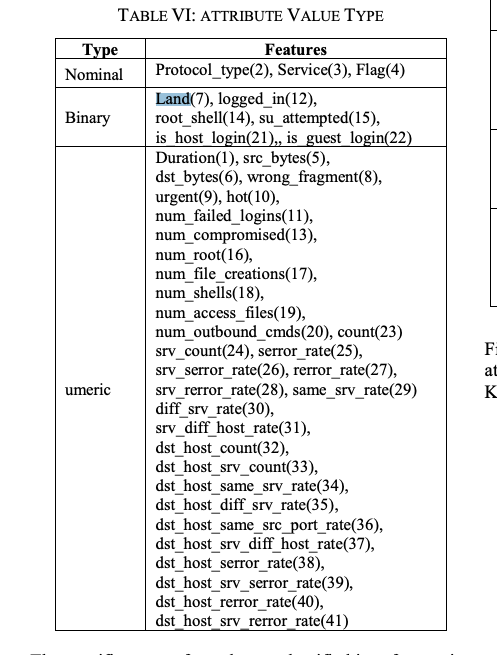

https://e-tarjome.com/storage/btn_uploaded/2019-07-13/1563006133_9702-etarjome-English.pdf

# 7. Normalizing numeric columns
At this point we need to normalize all the numeric columns.
We will use _standard scaling_ for normalization.



The `StandardScaler` in scikit-learn does not have hyperparameters to tune through traditional hyperparameter tuning techniques like grid search or random search because it is a simple scaling technique that standardizes features by removing the mean and scaling to unit variance.

However, you can control the behavior of the `StandardScaler` indirectly by altering your data before applying the scaling. For instance, you might choose to impute missing values, handle outliers, or perform other preprocessing steps prior to using the `StandardScaler`. These preprocessing steps can be tuned and optimized.

If you're interested in tuning different preprocessing steps along with scaling, you might want to consider using a more comprehensive preprocessing pipeline, where you can include other transformers in addition to the `StandardScaler`. This way, you can tune hyperparameters related to those transformers and the overall preprocessing pipeline.


In [9]:
#todo this is an awful looping needs simplification
# here just defining the method to call
std_scaler = StandardScaler()
def standardization(df,col):
    for i in col:
        arr = df[i]
        arr = np.array(arr)
        df[i] = std_scaler.fit_transform(arr.reshape(len(arr),1))
    return df

Normalization requires the numeric columns ONLY. For that reason we are filtering in the columns with datatype as number

In [10]:
numeric_col_train = train_data.select_dtypes(include='number').columns
numeric_col_test = test_data.select_dtypes(include='number').columns

# temporarily dropping the labeled data.
trainlabel=train_data["attack_state"]
train_data.drop("attack_state", axis=1)
testlabel=test_data["attack_state"]
test_data.drop("attack_state", axis=1)

,Unnamed: 0,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,ip_src,ip_dest
0,0,0,tcp,private,REJ,0,0,0,0,0,...,0.04,0.06,0.00,0.00,0.00,0.0,1.00,1.00,192.168.194.4,192.168.46.251
1,1,0,tcp,private,REJ,0,0,0,0,0,...,0.00,0.06,0.00,0.00,0.00,0.0,1.00,1.00,192.168.194.4,192.168.13.154
2,2,2,tcp,ftp_data,SF,12983,0,0,0,0,...,0.61,0.04,0.61,0.02,0.00,0.0,0.00,0.00,192.168.194.4,192.168.249.68
3,3,0,icmp,eco_i,SF,20,0,0,0,0,...,1.00,0.00,1.00,0.28,0.00,0.0,0.00,0.00,192.168.194.4,192.168.125.46
4,4,1,tcp,telnet,RSTO,0,15,0,0,0,...,0.31,0.17,0.03,0.02,0.00,0.0,0.83,0.71,192.168.194.4,192.168.230.52
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22303,22303,0,tcp,finger,SF,5,134,0,0,0,...,0.12,0.12,0.03,0.29,0.00,0.0,0.00,0.00,192.168.100.193,192.168.41.156
22304,22304,0,tcp,http,SF,300,369,0,0,0,...,1.00,0.00,0.01,0.02,0.00,0.0,0.00,0.00,192.168.29.58,192.168.158.50
22305,22305,0,tcp,private,REJ,0,0,0,0,0,...,0.04,0.08,0.00,0.00,0.05,0.0,0.95,1.00,192.168.29.58,192.168.21.73
22306,22306,0,udp,private,SF,53,54,0,0,0,...,1.00,0.00,0.86,0.00,0.00,0.0,0.00,0.00,192.168.29.58,192.168.90.11


In [11]:
# Adding back the labels
train_data = standardization(train_data,numeric_col_train)
test_data = standardization(test_data,numeric_col_test)
train_data["attack_state"]=trainlabel
test_data["attack_state"]=testlabel

In [12]:
test_data

,Unnamed: 0,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,...,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,ip_src,ip_dest,attack_state
0,-1.731973,-0.155467,tcp,private,REJ,-0.021809,-0.096631,-0.017717,-0.058698,-0.019562,...,-0.138035,-0.431941,-0.230294,-0.357681,-0.352508,1.978290,1.928534,192.168.194.4,192.168.46.251,1
1,-1.731818,-0.155467,tcp,private,REJ,-0.021809,-0.096631,-0.017717,-0.058698,-0.019562,...,-0.138035,-0.431941,-0.230294,-0.357681,-0.352508,1.978290,1.928534,192.168.194.4,192.168.13.154,1
2,-1.731663,-0.154049,tcp,ftp_data,SF,0.005521,-0.096631,-0.017717,-0.058698,-0.019562,...,-0.228743,1.559095,0.003623,-0.357681,-0.352508,-0.602857,-0.565503,192.168.194.4,192.168.249.68,0
3,-1.731507,-0.155467,icmp,eco_i,SF,-0.021767,-0.096631,-0.017717,-0.058698,-0.019562,...,-0.410160,2.832052,3.044539,-0.357681,-0.352508,-0.602857,-0.565503,192.168.194.4,192.168.125.46,1
4,-1.731352,-0.154758,tcp,telnet,RSTO,-0.021809,-0.095927,-0.017717,-0.058698,-0.019562,...,0.360862,-0.334021,0.003623,-0.357681,-0.352508,1.539495,1.205263,192.168.194.4,192.168.230.52,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22303,1.731352,-0.155467,tcp,finger,SF,-0.021799,-0.090346,-0.017717,-0.058698,-0.019562,...,0.134091,-0.334021,3.161497,-0.357681,-0.352508,-0.602857,-0.565503,192.168.100.193,192.168.41.156,0
22304,1.731507,-0.155467,tcp,http,SF,-0.021178,-0.079324,-0.017717,-0.058698,-0.019562,...,-0.410160,-0.399301,0.003623,-0.357681,-0.352508,-0.602857,-0.565503,192.168.29.58,192.168.158.50,0
22305,1.731663,-0.155467,tcp,private,REJ,-0.021809,-0.096631,-0.017717,-0.058698,-0.019562,...,-0.047326,-0.431941,-0.230294,-0.174451,-0.352508,1.849233,1.928534,192.168.29.58,192.168.21.73,1
22306,1.731818,-0.155467,udp,private,SF,-0.021698,-0.094098,-0.017717,-0.058698,-0.019562,...,-0.410160,2.375093,-0.230294,-0.357681,-0.352508,-0.602857,-0.565503,192.168.29.58,192.168.90.11,0


# 8. Handling categoricalvariables
At this step we will convert categorical variables into numeric values.
This process is called _categorical encoding_
Before doing that we need to ensure the categories are the same in both train and test data.
If number of categories are different encoding will generate different number of columns ending in an error.
Similary, if category count is same but having different categories ML Models will again fail.


For those reasons, we need to cross check the number and types of categories.
There are four categorical variables in the data:
*protocol_type
*service
*flag
*attack_status 

attack_status is under our control where we have already encoding as 0 and 1.

In [13]:
train_data["protocol_type"].nunique() 

3

In [14]:
train_data["service"].nunique()

70

In [15]:
train_data["flag"].nunique()

11

In [16]:
test_data["protocol_type"].nunique()

3

In [17]:
test_data["service"].nunique() 

64

In [18]:
test_data["flag"].nunique()

11

Train data [service] column has 70 different categories.
Test data [service] column has 64 different categories.

Removing the rows/records from train data with the categorical variables not existing in test data. So lets downsize train data a bit for the sake of making in aligned with test data.

In [19]:
testServiceValues=test_data["service"].unique()

In [20]:
trainServiceValues=train_data["service"].unique()

Listing the categorical values in train data but not in test data.

In [21]:
for x in trainServiceValues:
    if x not in testServiceValues:
        print(x)

red_i
urh_i
http_8001
aol
http_2784
harvest


In [22]:
train_data.shape

(125697, 45)

Removing the categorical values in train data but not in test data.

In [23]:
train_data = train_data[train_data.service != "red_i"]
train_data = train_data[train_data.service != "urh_i"]
train_data = train_data[train_data.service != "http_8001"]
train_data = train_data[train_data.service !="aol"]
train_data = train_data[train_data.service != "http_2784"]
train_data = train_data[train_data.service != "harvest"]

In [24]:
# validation after the removing process
train_data["service"].nunique() 
test_data["service"].nunique() 



64

In [25]:
# we have lost some records from train but that's OK
train_data.shape

(125672, 45)

In [26]:
# extracting datasets (no standard scaling no one hot encoding )
# done only once
train_data.to_csv('train_data_no_normal&encoding.csv', index=False)
test_data.to_csv('test_data_no_normal&encoding.csv', index=False)




Leveling of uniques variables in train and test is complete. Now it is time  focus more on the categorical variables
Encoding the categorical values in train and test data.

In [27]:
# ip_src and ip_dest also become a cetagorical
train_data = pd.get_dummies(train_data,columns=['protocol_type','service','flag','ip_src', 'ip_dest'],prefix="",prefix_sep="")  
test_data = pd.get_dummies(test_data,columns=['protocol_type','service','flag', 'ip_src', 'ip_dest'],prefix="",prefix_sep="")  

In [28]:
train_data.head(5)

,Unnamed: 0,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,...,192.168.41.162,192.168.46.251,192.168.53.196,192.168.63.104,192.168.65.123,192.168.77.182,192.168.78.144,192.168.83.223,192.168.87.123,192.168.90.11
0,-1.732037,-0.110315,-0.007686,-0.004923,-0.014104,-0.089495,-0.007744,-0.095066,-0.027052,-0.809090,...,False,True,False,False,False,False,False,False,False,False
1,-1.732009,-0.110315,-0.007745,-0.004923,-0.014104,-0.089495,-0.007744,-0.095066,-0.027052,-0.809090,...,False,False,False,False,False,False,False,False,False,False
2,-1.731982,-0.110315,-0.007770,-0.004923,-0.014104,-0.089495,-0.007744,-0.095066,-0.027052,-0.809090,...,False,False,False,False,False,False,False,False,False,False
3,-1.731954,-0.110315,-0.007730,-0.002898,-0.014104,-0.089495,-0.007744,-0.095066,-0.027052,1.235957,...,False,False,False,False,False,False,False,False,False,False
4,-1.731927,-0.110315,-0.007736,-0.004818,-0.014104,-0.089495,-0.007744,-0.095066,-0.027052,1.235957,...,False,False,False,False,False,False,False,False,False,False


In [29]:
test_data.head(5)

,Unnamed: 0,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,...,192.168.41.162,192.168.46.251,192.168.53.196,192.168.63.104,192.168.65.123,192.168.77.182,192.168.78.144,192.168.83.223,192.168.87.123,192.168.90.11
0,-1.731973,-0.155467,-0.021809,-0.096631,-0.017717,-0.058698,-0.019562,-0.113186,-0.14413,-0.889755,...,False,True,False,False,False,False,False,False,False,False
1,-1.731818,-0.155467,-0.021809,-0.096631,-0.017717,-0.058698,-0.019562,-0.113186,-0.14413,-0.889755,...,False,False,False,False,False,False,False,False,False,False
2,-1.731663,-0.154049,0.005521,-0.096631,-0.017717,-0.058698,-0.019562,-0.113186,-0.14413,-0.889755,...,False,False,False,False,False,False,False,False,False,False
3,-1.731507,-0.155467,-0.021767,-0.096631,-0.017717,-0.058698,-0.019562,-0.113186,-0.14413,-0.889755,...,False,False,False,False,False,False,False,False,False,False
4,-1.731352,-0.154758,-0.021809,-0.095927,-0.017717,-0.058698,-0.019562,-0.113186,-0.14413,-0.889755,...,False,False,False,False,False,False,False,False,False,False


# 9. Feature Selection
we are going ti use mutual information techniques and 
SelectKBest class

In [30]:
y_train = train_data["attack_state"]
X_train = train_data.drop("attack_state", axis=1)
print('X_train shape:',X_train.shape,'\ny_train shape:',y_train.shape)

X_train shape: (125672, 210) 
y_train shape: (125672,)


In [31]:
y_test = test_data["attack_state"]
X_test = test_data.drop("attack_state", axis=1)
print('X_test shape:',X_test.shape,'\ny_train has shape:',y_test.shape)

X_test shape: (22308, 210) 
y_train has shape: (22308,)


In [32]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_classif

In [35]:
selected_features = SelectKBest(mutual_info_classif, k=50).fit(X_train, y_train)

In [34]:
features = X_train.columns[selected_features.get_support()]
features

Index(['duration', 'src_bytes', 'dst_bytes', 'wrong_fragment', 'hot',
       'logged_in', 'num_compromised', 'count', 'srv_count', 'serror_rate',
       'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate',
       'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
       'dst_host_srv_count', 'dst_host_same_srv_rate',
       'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
       'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
       'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
       'dst_host_srv_rerror_rate', 'icmp', 'tcp', 'udp', 'Z39_50', 'courier',
       'daytime', 'domain_u', 'eco_i', 'ecr_i', 'ftp_data', 'http', 'iso_tsap',
       'netbios_ssn', 'nnsp', 'private', 'smtp', 'supdup', 'uucp', 'uucp_path',
       'whois', 'REJ', 'RSTR', 'S0', 'SF'],
      dtype='object')

In [53]:
# this shows that ip_src and ip_dest are not present in the best 50 features.